In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
#from tensorflow.nn import rnn, rnn_cell
import numpy as np




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
#先来看输入数据，本次用打输入数据是MNIST打数据可以看到如下
print '输入数据:'
print mnist.train.images
print '输入数据打shape:'
print mnist.train.images.shape

输入数据:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
输入数据打shape:
(55000, 784)


Populating the interactive namespace from numpy and matplotlib


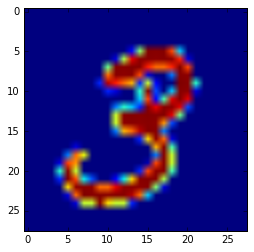

In [2]:
#可以看到其中784是图据28×28像素打图像，将其转化成图像观察一下如下图所示，
#如果我们要用RNN来训练这个网络打话，则应该选择n_input = 28 ，n_steps = 28结构
%pylab inline
%matplotlib inline
import pylab 

im = mnist.train.images[1]
im = im.reshape(-1,28)
pylab.imshow(im)
pylab.show()

In [3]:
#从下面几个小实验中可以看到接下来几个函数打效果
a= np.asarray(range(20))
b = a.reshape(-1,2,2)
print '生成一列数据'
print a
print 'reshape函数的效果'
print b

生成一列数据
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
reshape函数的效果
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]

 [[16 17]
  [18 19]]]


In [4]:
c = np.transpose(b,[1,0,2])
d = c.reshape(-1,2)
print '--------c-----------'
print c
print '--------d-----------'
print d

--------c-----------
[[[ 0  1]
  [ 4  5]
  [ 8  9]
  [12 13]
  [16 17]]

 [[ 2  3]
  [ 6  7]
  [10 11]
  [14 15]
  [18 19]]]
--------d-----------
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]
 [16 17]
 [ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]]


In [5]:
#定义一些模型打参数
'''
To classify images using a reccurent neural network, we consider every image row as a sequence of pixels.
Because MNIST image shape is 28*28px, we will then handle 28 sequences of 28 steps for every sample.
'''
# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 128
display_step = 100

# Network Parameters
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)



In [6]:
# 构建RNN打函数可以参考 :https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#dynamic_rnn
# 开始我们先创建两个占位符placeholder，基本使用可以参考官方文档：http://wiki.jikexueyuan.com/project/tensorflow-zh/get_started/basic_usage.html

# tf Graph input
x = tf.placeholder("float32", [None, n_steps, n_input])
# Tensorflow LSTM cell requires 2x n_hidden length (state & cell)
y = tf.placeholder("float32", [None, n_classes])

# Define weights
weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [7]:
#首先创建一个CELL这里需要打一个参数是隐藏单元打个数n_hidden，
#在创建完成后对其进行初始化
lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden, forget_bias=0.0, state_is_tuple=True)
_state = lstm_cell.zero_state(batch_size,tf.float32)
#为了使得 原始数据打输入和模型匹配，我们对数据进行一系列变换，变换打结果如下
a1 = tf.transpose(x, [1, 0, 2])
a2 = tf.reshape(a1, [-1, n_input]) 
a3 = tf.matmul(a2, weights['hidden']) + biases['hidden']   
a4 = tf.split(0, n_steps, a3)
print '-----------------------'

print 'a1:'
print a1
print '-----------------------'

print 'a2:'
print a2
print '-----------------------'
print 'a3:'
print a3
print '-----------------------'
print 'a4:'
print a4
#为了使得 原始数据打输入和模型匹配，我们对数据进行一系列变换，变换打结果如下
#这里主要是为了匹配tf.nn.rnn遮盖函数，函数可参考官方文档：https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#dynamic_rnn
#或者前面解读RNN那篇

outputs, states = tf.nn.rnn(lstm_cell, a4, initial_state = _state)
print 'outputs[-1]'
print outputs[-1]
print '-----------------------'

a5 = tf.matmul(outputs[-1], weights['out']) + biases['out']
print 'a5:'
print a5
print '-----------------------'


-----------------------
a1:
Tensor("transpose:0", shape=(28, ?, 28), dtype=float32)
-----------------------
a2:
Tensor("Reshape:0", shape=(?, 28), dtype=float32)
-----------------------
a3:
Tensor("add:0", shape=(?, 128), dtype=float32)
-----------------------
a4:
[<tf.Tensor 'split:0' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:1' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:2' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:3' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:4' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:5' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:6' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:7' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:8' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:9' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:10' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:11' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:12' shape=(?, 128) dtype=float32>, <tf.Tensor 'split:13' shape=(?, 128) dtype=float32>, <t

In [8]:
#定义cost，使用梯度下降求最优
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(a5, y))

#AdamOptimizer
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer
correct_pred = tf.equal(tf.argmax(a5,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.initialize_all_variables()


In [9]:
#进行模型训练
sess = tf.InteractiveSession() 
sess.run(init)
step = 1
# Keep training until reach max iterations
while step * batch_size < training_iters:
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    # Reshape data to get 28 seq of 28 elements
    batch_xs = batch_xs.reshape((batch_size, n_steps, n_input))
    # Fit training using batch data
    sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
    if step % display_step == 0:
            # Calculate batch accuracy
        acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys,})
            # Calculate batch loss
        loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})
        print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + "{:.6f}".format(loss) +  ", Training Accuracy= " + "{:.5f}".format(acc)
    step += 1
print "Optimization Finished!"
# Calculate accuracy for 256 mnist test images


Iter 12800, Minibatch Loss= 2.099122, Training Accuracy= 0.22656
Iter 25600, Minibatch Loss= 1.789904, Training Accuracy= 0.39062
Iter 38400, Minibatch Loss= 1.570300, Training Accuracy= 0.49219
Iter 51200, Minibatch Loss= 1.402080, Training Accuracy= 0.55469
Iter 64000, Minibatch Loss= 1.353885, Training Accuracy= 0.57031
Iter 76800, Minibatch Loss= 1.279649, Training Accuracy= 0.53906
Iter 89600, Minibatch Loss= 1.104813, Training Accuracy= 0.68750
Optimization Finished!


In [10]:
#测试模型准确率
test_len = batch_size
test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
test_label = mnist.test.labels[:test_len]
# Evaluate model
correct_pred = tf.equal(tf.argmax(a5,1), tf.argmax(y,1))
print "Testing Accuracy:", sess.run(accuracy, feed_dict={x: test_data, y: test_label})

Testing Accuracy: 0.609375
